In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('masterDataCleaned.csv')

In [3]:
df.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,city
0,30000000,3340,JP Nagar Phase 1,4,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,Bangalore
1,7888000,1045,Dasarahalli on Tumkur Road,2,0,0,1,1,1,1,...,0,1,0,0,0,0,0,0,0,Bangalore
2,4866000,1179,Kannur on Thanisandra Main Road,2,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,Bangalore
3,8358000,1675,Doddanekundi,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Bangalore
4,6845000,1670,Kengeri,3,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,Bangalore


<AxesSubplot:xlabel='Area', ylabel='Count'>

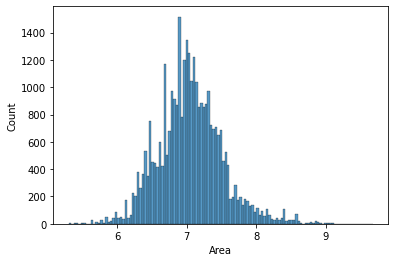

In [4]:
sns.histplot(np.log(df.Area))

In [5]:
np.log(df.Area).std()

0.46633385811153527

In [6]:
np.log(df.Area).mean()

7.046369030712827

In [7]:
df.Area.mean()

1293.3621939750628

In [8]:
df.columns

Index(['Price', 'Area', 'Location', 'No. of Bedrooms', 'Resale',
       'MaintenanceStaff', 'Gymnasium', 'SwimmingPool', 'LandscapedGardens',
       'JoggingTrack', 'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall',
       'Intercom', 'SportsFacility', 'ATM', 'ClubHouse', 'School',
       '24X7Security', 'PowerBackup', 'CarParking', 'StaffQuarter',
       'Cafeteria', 'MultipurposeRoom', 'Hospital', 'WashingMachine',
       'Gasconnection', 'AC', 'Wifi', 'Children'splayarea', 'LiftAvailable',
       'BED', 'VaastuCompliant', 'Microwave', 'GolfCourse', 'TV',
       'DiningTable', 'Sofa', 'Wardrobe', 'Refrigerator', 'city'],
      dtype='object')

In [9]:
df.Location.nunique()

1776

In [10]:
df.shape

(32963, 41)

In [11]:
np.log(df.groupby('city').Price.mean())

city
Bangalore    16.174958
Chennai      15.982421
Delhi        16.580973
Hyderabad    16.099767
Kolkata      15.956584
Mumbai       16.527662
Name: Price, dtype: float64

In [12]:
np.log(df.groupby('city')['No. of Bedrooms'].mean())

city
Bangalore    0.938816
Chennai      0.859925
Delhi        0.977522
Hyderabad    0.964513
Kolkata      0.967427
Mumbai       0.648846
Name: No. of Bedrooms, dtype: float64

C:\Users\Aamir\anaconda3\envs\tf\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Area'>

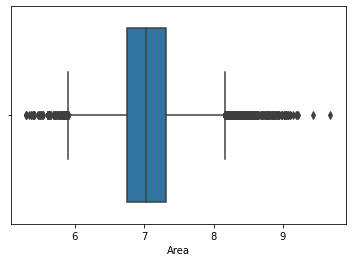

In [13]:
sns.boxplot(np.log(df['Area']))

In [14]:
def countOutliers(feature):
    lowerQuantile,higherQuantile = np.quantile(feature,[0.25,0.75])
    IQR=higherQuantile-lowerQuantile
    lowerLimit=lowerQuantile-1.5*IQR
    upperLimit=higherQuantile+1.5*IQR
    total=feature[(feature>=upperLimit) | (feature<=lowerLimit)]
    print(len(total))

countOutliers(np.log(df['Area']))

907


In [15]:
df['Area']=np.log(df['Area'])

In [16]:
df['Area']

0        8.113726
1        6.951772
2        7.072422
3        7.423568
4        7.420579
           ...   
32958    7.073270
32959    6.272877
32960    6.551080
32961    6.902743
32962    6.927558
Name: Area, Length: 32963, dtype: float64

In [17]:
tf,ff, sf=np.quantile(df['Area'],[0.25,0.5,0.75])

In [18]:
data={}
for i in df.columns[4:-1]:
    bin1=len(df[df['Area']<=tf][df[i]==1])
    bin2=len(df[(df['Area']>=tf) & (df['Area']<=ff)][df[i]==1])
    bin3=len(df[(df['Area']>ff) & (df['Area']<=sf)][df[i]==1])
    bin4=len(df[df['Area']>sf][df[i]==1])
    data[i]={'verySmall':bin1,'small':bin2,'medium':bin3,'large':bin4}

print(data)



C:\Users\Aamir\AppData\Local\Temp/ipykernel_19432/1669681743.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bin1=len(df[df['Area']<=tf][df[i]==1])
C:\Users\Aamir\AppData\Local\Temp/ipykernel_19432/1669681743.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bin2=len(df[(df['Area']>=tf) & (df['Area']<=ff)][df[i]==1])
C:\Users\Aamir\AppData\Local\Temp/ipykernel_19432/1669681743.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bin3=len(df[(df['Area']>ff) & (df['Area']<=sf)][df[i]==1])
C:\Users\Aamir\AppData\Local\Temp/ipykernel_19432/1669681743.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bin4=len(df[df['Area']>sf][df[i]==1])


{'Resale': {'verySmall': 4147, 'small': 2827, 'medium': 2478, 'large': 3121}, 'MaintenanceStaff': {'verySmall': 455, 'small': 324, 'medium': 395, 'large': 546}, 'Gymnasium': {'verySmall': 509, 'small': 879, 'medium': 1713, 'large': 2155}, 'SwimmingPool': {'verySmall': 327, 'small': 509, 'medium': 1468, 'large': 1884}, 'LandscapedGardens': {'verySmall': 340, 'small': 451, 'medium': 1160, 'large': 1572}, 'JoggingTrack': {'verySmall': 285, 'small': 451, 'medium': 1143, 'large': 1485}, 'RainWaterHarvesting': {'verySmall': 401, 'small': 583, 'medium': 1194, 'large': 1533}, 'IndoorGames': {'verySmall': 179, 'small': 377, 'medium': 930, 'large': 1283}, 'ShoppingMall': {'verySmall': 82, 'small': 98, 'medium': 254, 'large': 318}, 'Intercom': {'verySmall': 514, 'small': 733, 'medium': 1365, 'large': 1948}, 'SportsFacility': {'verySmall': 143, 'small': 366, 'medium': 912, 'large': 1350}, 'ATM': {'verySmall': 148, 'small': 129, 'medium': 323, 'large': 421}, 'ClubHouse': {'verySmall': 381, 'small':

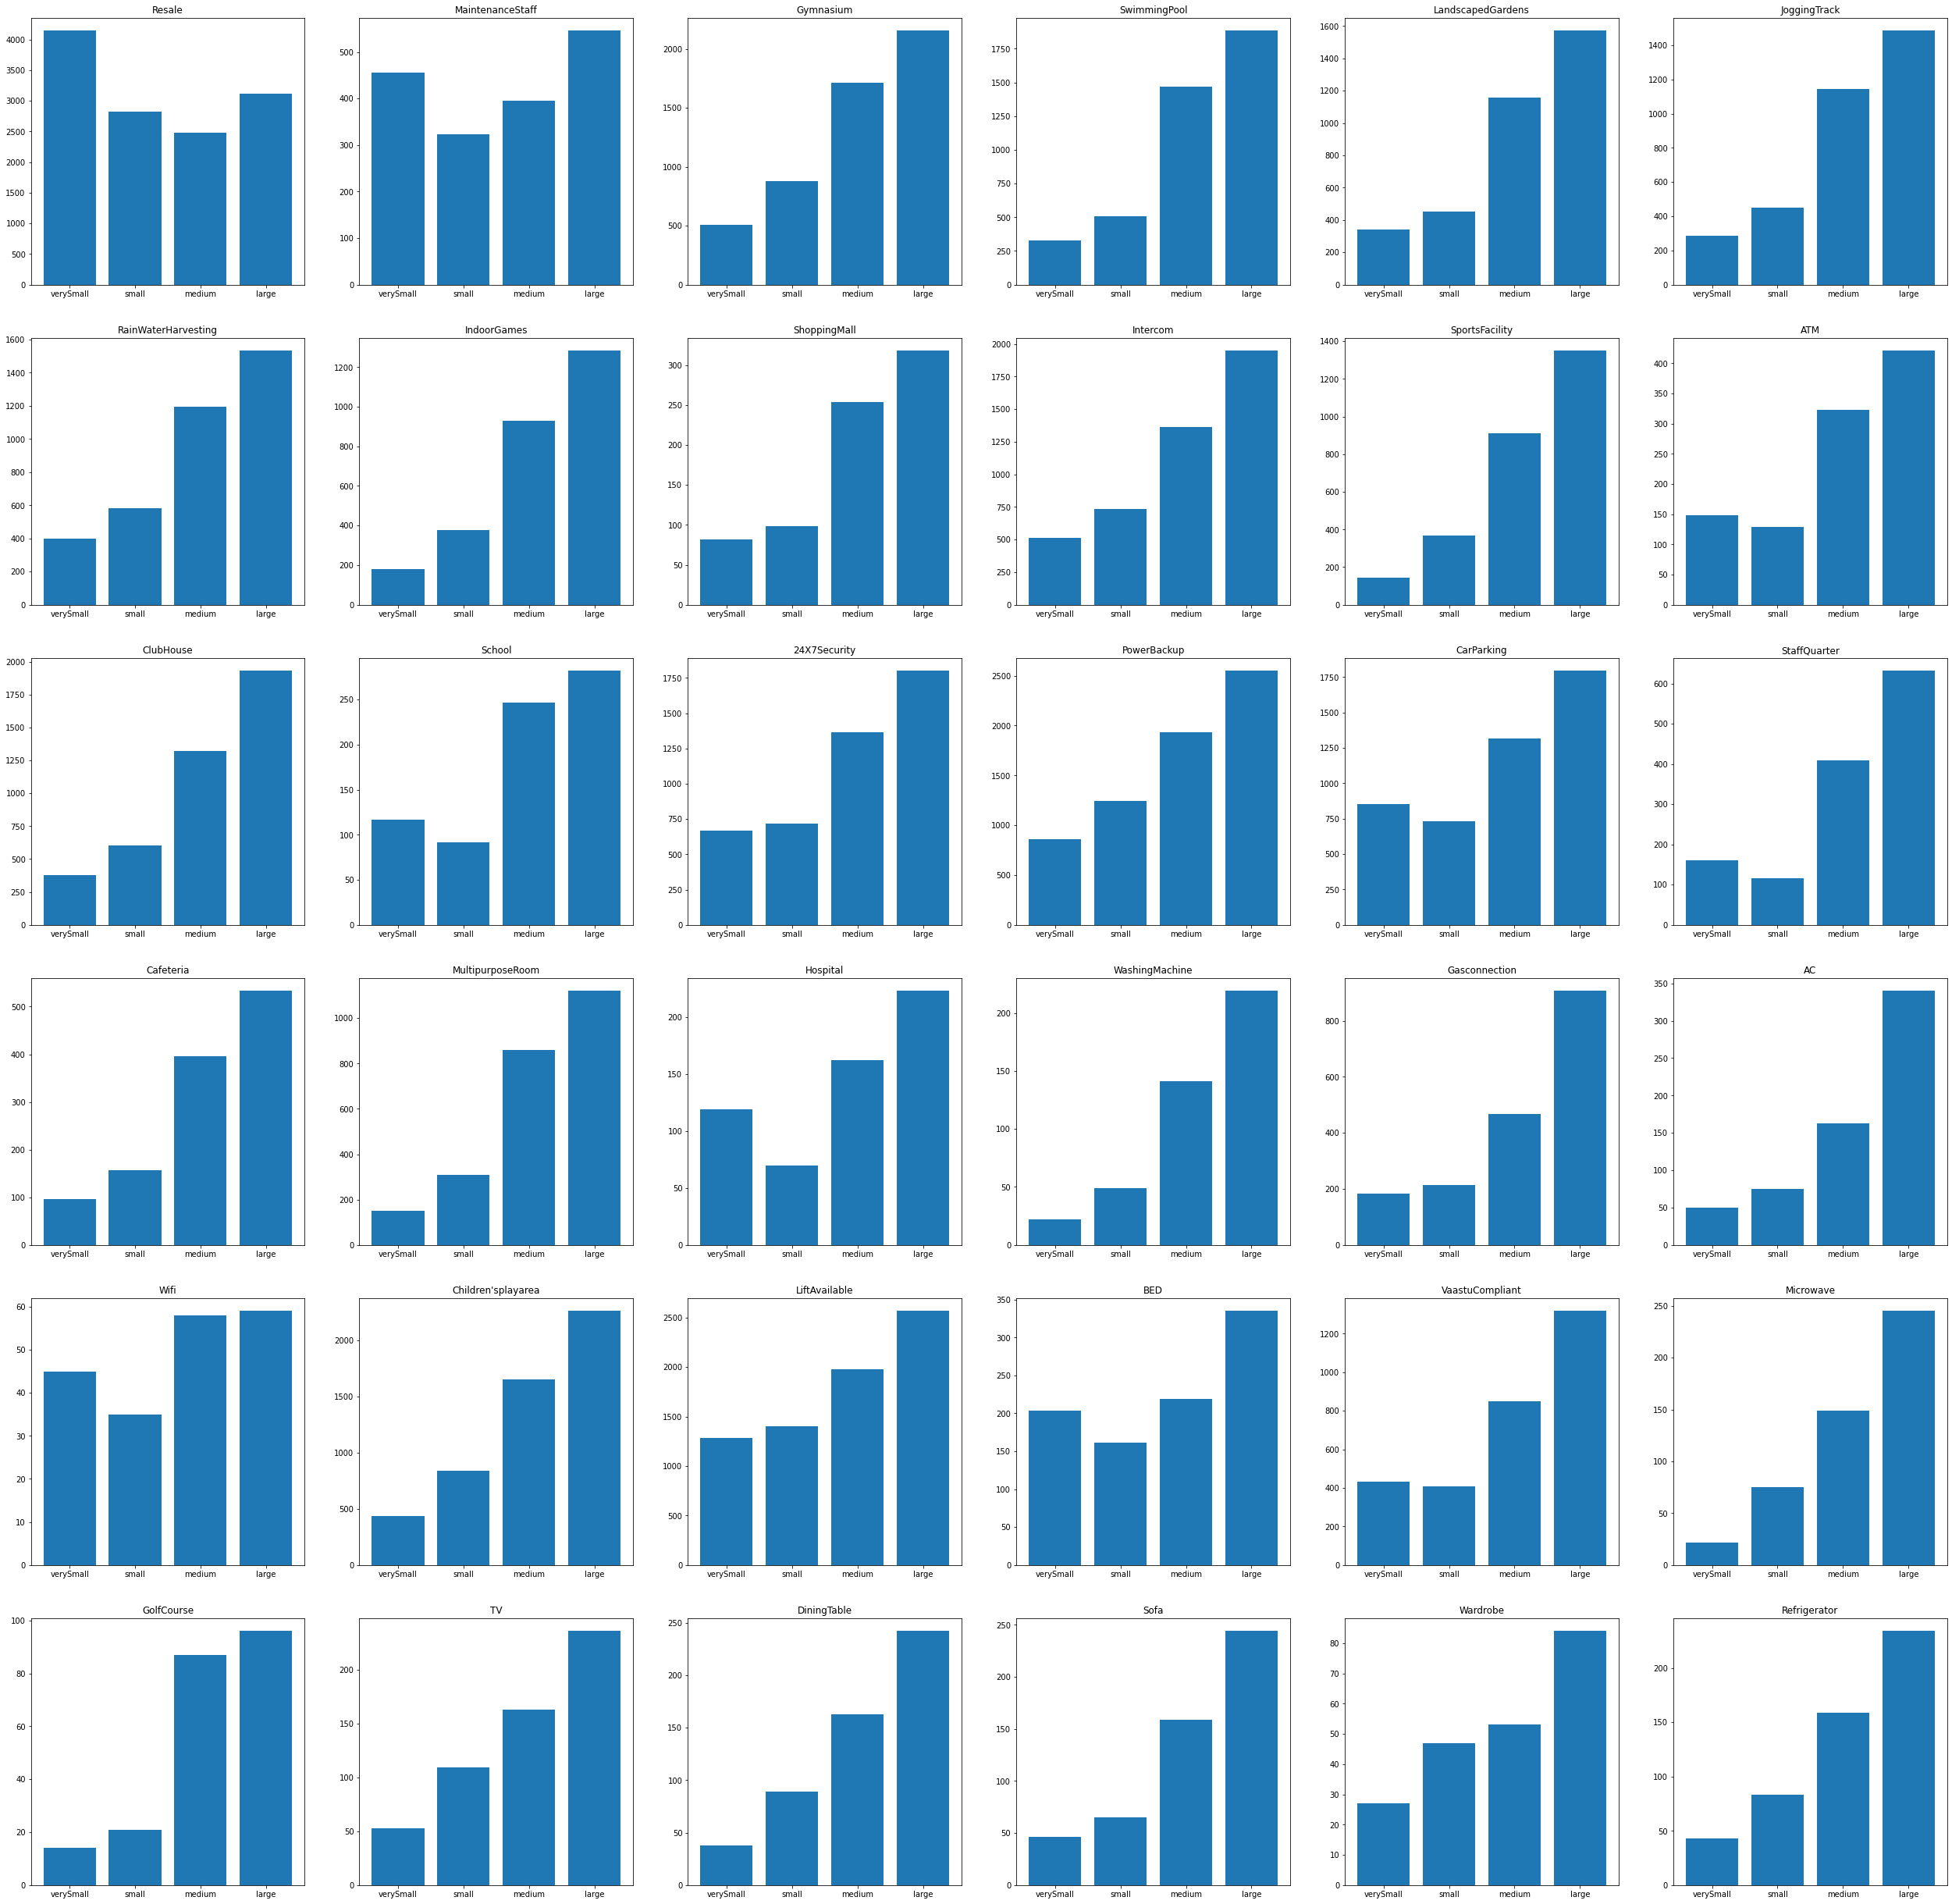

In [19]:
fig,ax=plt.subplots(6,6,figsize=(44,44))
ax=ax.flatten()
for axes,i in zip(ax,data.keys()):
    keys=data[i].keys()
    vals=data[i].values()
    axes.bar(keys,vals)
    axes.set_title(i)

In [20]:
df.loc[df[df['Area']<1000]['SwimmingPool'].isna(),'SwimmingPool']=1000

In [21]:
df['SwimmingPool'].isna().sum()

0

In [22]:
df.index.is_unique


True

In [10]:
df.tail()

,Unnamed: 0,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,...,Sofa,Wardrobe,Refrigerator,AreaType,Bangalore,Chennai,Delhi,Hyderabad,Kolkata,Mumbai
32958,7714,1180.0,2.0,0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3,0,0,0,0,0,1
32959,7715,530.0,1.0,1,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1,0,0,0,0,0,1
32960,7716,700.0,1.0,0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1,0,0,0,0,0,1
32961,7717,995.0,2.0,0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2,0,0,0,0,0,1
32962,7718,1020.0,2.0,0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2,0,0,0,0,0,1


In [13]:
array=df.values

In [23]:
array[np.where(array[:-7]==1)[0]].mean(axis=0)

array([2.64892472e+03, 1.26517553e+03, 2.40108881e+00, 4.07906846e-01,
       1.13482685e-01, 9.03545119e-01, 2.84840891e-01, 2.48188555e-01,
       2.45682560e-01, 2.56263907e-01, 2.02605371e-01, 6.61064184e-02,
       2.77387716e-01, 1.91725896e-01, 8.52686383e-02, 2.88271512e-01,
       6.27017218e-02, 2.98416470e-01, 9.41160967e-01, 2.90544190e-01,
       1.13180237e-01, 9.05960379e-02, 1.79952040e-01, 4.97656031e-02,
       4.06100801e-02, 1.04685778e-01, 5.02624814e-02, 1.62673637e-02,
       8.93387198e-01, 9.42612716e-01, 6.24122362e-02, 2.06973579e-01,
       4.27574586e-02, 2.07911167e-02, 4.48443475e-02, 4.56091080e-02,
       4.55356564e-02, 1.37829722e-02, 4.48659509e-02, 2.57039037e+00,
       2.19071486e-01, 1.38028473e-01, 1.35617533e-01, 9.41303549e-02,
       1.56598760e-01, 2.56553393e-01])

In [3]:
df['IQR']=np.nan

In [5]:
df[df['Delhi']==1]['IQR']=5

C:\Users\Aamir\AppData\Local\Temp/ipykernel_17496/2005501739.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df['Delhi']==1]['IQR']=5


In [7]:
df.loc[df['Delhi']==1,'IQR']=5

In [11]:
city=pd.read_csv('partAB.csv')

In [12]:
city.head()

,Unnamed: 0_level_0,Unnamed: 0_level_1,Unnamed: 1_level_1,Unnamed: 2_level_1,Unnamed: 3_level_1,Unnamed: 4_level_1,Unnamed: 5_level_1,Unnamed: 6_level_1,Unnamed: 7_level_1,Unnamed: 8_level_1,...,Car/ Jeep/Van,"Households with TV, Computer/Laptop, Telephone/mobile phone and Scooter/ Car",None of the assets specified in col. 10 to 19,Unnamed: 139_level_1,Unnamed: 140_level_1,Unnamed: 141_level_1,Unnamed: 142_level_1,Unnamed: 143_level_1,Unnamed: 144_level_1,city
0,Unnamed: 0_level_1,Unnamed: 0_level_2,Unnamed: 1_level_2,Unnamed: 2_level_2,Unnamed: 3_level_2,Unnamed: 4_level_2,Unnamed: 5_level_2,Unnamed: 6_level_2,Unnamed: 7_level_2,Unnamed: 8_level_2,...,Unnamed: 136_level_2,Unnamed: 137_level_2,Unnamed: 138_level_2,Permanent,Semi-Permanent,Total Temporary,Serviceable,Non-Serviceable,Unclassifiable,NaN
1,0,27,MAHARASHTRA,519,Mumbai,0,Mumbai,0,0,District - Mumbai,...,12.6,15.7,2.2,93.9,3.9,0.8,0.4,0.4,1.4,MUMBAI
2,1,27,MAHARASHTRA,519,Mumbai,0,Mumbai,0,0,District - Mumbai,...,12.6,15.7,2.2,93.9,3.9,0.8,0.4,0.4,1.4,MUMBAI
3,2,27,MAHARASHTRA,519,Mumbai,99999,Area not under any Sub-district,0,0,Sub-Dist - Area not under any Sub-district,...,12.6,15.7,2.2,93.9,3.9,0.8,0.4,0.4,1.4,MUMBAI
4,3,27,MAHARASHTRA,519,Mumbai,99999,Area not under any Sub-district,0,0,Sub-Dist - Area not under any Sub-district,...,12.6,15.7,2.2,93.9,3.9,0.8,0.4,0.4,1.4,MUMBAI


In [ ]:
[82,85,91,106,124,103,104,127,114]

[128,129,132,133,134,135,136,137,130,131]

In [47]:
BAI=city.iloc[:,[82,85,91,106,124,103,104,127,114,-1]].drop(0)

In [49]:
for i in BAI:
    if i !='city':
        BAI[i]=BAI[i].astype('float')


In [51]:
BAI=BAI.groupby('city').mean()

In [52]:
BAI

,Within premises,Electricity,Unnamed: 90_level_1,Closed drainage,Has Kitchen.1,Yes,Yes.1,Unnamed: 126_level_1,LPG/PNG
city,,,,,,,,,
BANGLORE,47.838232,96.012545,72.805496,32.821266,0.665114,86.528196,4.976464,55.420072,51.012425
CHENNAI,75.590625,98.945000,94.558125,95.670625,0.476250,94.740000,1.453750,70.844375,82.204375
DELHI,76.502384,98.369934,86.481325,49.108609,0.476159,84.887152,4.995762,77.575762,86.239073
HYDERABAD,91.577987,98.684277,98.249057,96.172327,0.381761,97.601258,1.311950,59.837107,66.686164
KOLKATA,75.656164,96.285616,94.915068,84.288356,0.662329,82.656164,7.805479,84.508904,64.612329
MUMBAI,88.877273,98.484091,76.915909,93.909091,0.295455,92.131818,4.240909,89.306818,82.459091


In [61]:
BAI['bathroom']=BAI.iloc[:,-5]+BAI.iloc[:,-4]
BAI.drop(['Yes','Yes.1'],inplace=True,axis=1)

In [63]:
BAI.to_csv('BAI.csv')

In [82]:
AI=city.iloc[:,[128,129,132,133,134,135,136,137,130,131,-1]].drop(0)

In [83]:
for i in AI:
    if i !='city':
        AI[i]=AI[i].astype('float')


In [84]:
AI['tele/mobile']=AI.iloc[:,2]+AI.iloc[:,3]+AI.iloc[:,4]
AI['comp/laptop']=AI.iloc[:,-4]+AI.iloc[:,-3]
AI.columns

Index(['Radio/\nTransistor', 'Television', 'Telephone/Mobile Phone',
       'Telephone/Mobile Phone.1', 'Telephone/Mobile Phone.2', 'Bicycle',
       'Scooter/ Motorcycle/Moped', 'Car/ Jeep/Van', 'Computer/Laptop',
       'Computer/Laptop.1', 'city', 'tele/mobile', 'comp/laptop'],
      dtype='object')

In [85]:
AI.drop(['Computer/Laptop','Computer/Laptop.1','Telephone/Mobile Phone','Telephone/Mobile Phone.1', 'Telephone/Mobile Phone.2'],axis=1,inplace=True)

In [89]:
AI=AI.groupby('city').mean()

In [90]:
AI

,Radio/\nTransistor,Television,Bicycle,Scooter/ Motorcycle/Moped,Car/ Jeep/Van,tele/mobile,comp/laptop
city,,,,,,,
BANGLORE,35.115293,77.147790,31.297133,38.028076,9.963680,82.588889,16.867025
CHENNAI,35.148125,95.545625,35.096250,45.407500,12.754375,91.445625,32.025625
DELHI,32.741987,86.585033,33.362252,39.259868,19.559603,89.665430,26.296159
HYDERABAD,32.527673,84.972956,26.381761,50.685535,14.407547,90.616981,31.620126
KOLKATA,47.773973,84.256849,22.794521,11.480137,8.850685,89.469863,26.396575
MUMBAI,36.870455,86.036364,8.972727,19.945455,14.040909,94.961364,35.875000


In [98]:
np.random.seed(2022)

In [100]:
np.random.normal(0,1,7)

array([ 0.54029727,  0.37349729,  0.37781339, -0.09021319, -2.30594327,
        1.14276002, -1.53565429])

In [101]:
BAI

,Within premises,Electricity,Unnamed: 90_level_1,Closed drainage,Has Kitchen.1,Unnamed: 126_level_1,LPG/PNG,bathroom
city,,,,,,,,
BANGLORE,47.838232,96.012545,72.805496,32.821266,0.665114,55.420072,51.012425,91.504659
CHENNAI,75.590625,98.945000,94.558125,95.670625,0.476250,70.844375,82.204375,96.193750
DELHI,76.502384,98.369934,86.481325,49.108609,0.476159,77.575762,86.239073,89.882914
HYDERABAD,91.577987,98.684277,98.249057,96.172327,0.381761,59.837107,66.686164,98.913208
KOLKATA,75.656164,96.285616,94.915068,84.288356,0.662329,84.508904,64.612329,90.461644
MUMBAI,88.877273,98.484091,76.915909,93.909091,0.295455,89.306818,82.459091,96.372727


In [102]:
QHI=pd.read_csv('QHI.csv')

In [125]:
QHI.head()

,Unnamed: 0,Total,Owned,Unnamed: 139_level_1,No exclusive room,Atleast2Rooms
0,NaN,Good,Unnamed: 62_level_2,Permanent,Unnamed: 48_level_2,NaN
1,"('city', '')",NaN,NaN,NaN,NaN,NaN
2,BANGLORE,69.76009557945042,59.15985663082438,83.46917562724013,11.776463560334527,50.427838
3,CHENNAI,80.05625,45.795625,94.09375,2.2725,59.238125
4,DELHI,63.36543046357616,68.29549668874172,94.68781456953643,1.417615894039735,67.068079


In [136]:
def weighted_sum(data):
    np.random.seed(2022)
    result={}
    weights=np.asarray(np.random.normal(0,1,data.shape[1]))
    for i in data.index:
        array=data.loc[i].values
        print(array)
        result[i]=np.sum(weights*array)
    return result


In [137]:
AI.loc['BANGLORE',:].values

array([35.11529271, 77.14778973, 31.29713262, 38.02807646,  9.96367981,
       82.58888889, 16.86702509])

In [138]:
res=weighted_sum(AI)

[35.11529271 77.14778973 31.29713262 38.02807646  9.96367981 82.58888889
 16.86702509]
[35.148125 95.545625 35.09625  45.4075   12.754375 91.445625 32.025625]
[32.74198675 86.58503311 33.36225166 39.25986755 19.55960265 89.66543046
 26.29615894]
[32.52767296 84.97295597 26.38176101 50.68553459 14.40754717 90.61698113
 31.62012579]
[47.7739726  84.25684932 22.79452055 11.48013699  8.85068493 89.46986301
 26.39657534]
[36.87045455 86.03636364  8.97272727 19.94545455 14.04090909 94.96136364
 35.875     ]


In [139]:
res

{'BANGLORE': 120.6098366179014,
 'CHENNAI': 141.75692810006427,
 'DELHI': 131.1028445533481,
 'HYDERABAD': 156.06768595374538,
 'KOLKATA': 74.9331643976931,
 'MUMBAI': 101.67092748540654}

In [147]:
QHI=city.iloc[:,[12,63,51,52,53,54,55,140,49,-1]].drop(0).rename({'Unnamed: 139_level_1':'Permanent'},axis=1)

In [150]:
QHI

,Total.1,Owned,Two rooms,Three rooms,Four rooms,Five rooms,Six rooms and above,Permanent,No exclusive room,city
1,72.2,67.1,15.8,7.7,2.9,0.8,0.7,93.9,9.3,MUMBAI
2,72.2,67.1,15.8,7.7,2.9,0.8,0.7,93.9,9.3,MUMBAI
3,72.2,67.1,15.8,7.7,2.9,0.8,0.7,93.9,9.3,MUMBAI
4,72.2,67.1,15.8,7.7,2.9,0.8,0.7,93.9,9.3,MUMBAI
5,72.2,67.1,15.8,7.7,2.9,0.8,0.7,93.9,9.3,MUMBAI
...,...,...,...,...,...,...,...,...,...,...
2097,88.9,64.2,19.2,33.6,16.3,4.4,3.8,96.3,1.5,CHENNAI
2098,84.9,53.9,21.3,23.1,14.7,6.1,3.3,92.6,2.0,CHENNAI
2099,87.6,52.9,27.4,28.3,10.5,2.6,1.1,95.5,3.0,CHENNAI
2100,82.6,55.8,26.3,14.7,4.2,1.1,0.8,89.7,3.3,CHENNAI


In [149]:
for i in QHI:
    if i !='city':
        QHI[i]=QHI[i].astype('float')


In [151]:
QHI['MoreThan2BedRooms']=QHI.iloc[:,2]+QHI.iloc[:,3]+QHI.iloc[:,4]+QHI.iloc[:,5]+QHI.iloc[:,6]

In [153]:
QHI.columns

Index(['Total.1', 'Owned ', 'Two rooms', 'Three rooms', 'Four rooms',
       'Five rooms', 'Six rooms and above', 'Permanent', 'No exclusive room',
       'city', 'MoreThan2BedRooms'],
      dtype='object')

In [154]:
QHI.drop(['Two rooms', 'Three rooms', 'Four rooms',
       'Five rooms', 'Six rooms and above'],axis=1,inplace=True)

In [156]:
QHI.groupby('city').mean().to_csv('QHI.csv')

In [163]:
QHI=pd.read_csv('BAI.csv',index_col='city')

In [164]:
QHI

,Within premises,Electricity,Unnamed: 90_level_1,Closed drainage,Has Kitchen.1,Unnamed: 126_level_1,LPG/PNG,bathroom
city,,,,,,,,
BANGLORE,47.838232,96.012545,72.805496,32.821266,0.665114,55.420072,51.012425,91.504659
CHENNAI,75.590625,98.945000,94.558125,95.670625,0.476250,70.844375,82.204375,96.193750
DELHI,76.502384,98.369934,86.481325,49.108609,0.476159,77.575762,86.239073,89.882914
HYDERABAD,91.577987,98.684277,98.249057,96.172327,0.381761,59.837107,66.686164,98.913208
KOLKATA,75.656164,96.285616,94.915068,84.288356,0.662329,84.508904,64.612329,90.461644
MUMBAI,88.877273,98.484091,76.915909,93.909091,0.295455,89.306818,82.459091,96.372727
